<a href="https://colab.research.google.com/github/bademirci/machine_learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BATUHAN DEMİRCİ






##K-Means Algorithm

1. Conduct necessary preprocessing of data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("BankChurners.csv", index_col=0)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
attrition_mapper = {'Attrited Customer':0, 'Existing Customer':1}
income_mapper = {'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
education_mapper = {'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
card_mapper = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}

df["Attrition_Flag"] = df["Attrition_Flag"].replace(attrition_mapper)
df["Income_Category"] = df["Income_Category"].replace(income_mapper)
df["Education_Level"] = df["Education_Level"].replace(education_mapper)
df["Card_Category"] = df["Card_Category"].replace(card_mapper)

#For the rest of the categorical data (gender, marital status) use one hot encoding (use
#pandas.get_dummies). Delete one of the columns for each category (i.e. gender_M and
#Marital_Status_Unknown) to avoid dummy trap.

df = pd.get_dummies(df, columns = ["Gender", "Marital_Status"])
df = df.drop(columns=["Marital_Status_Unknown","Gender_M"])
df.head()


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,,
768805383,1,45,3,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,1,0
818770008,1,49,5,4,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,1
713982108,1,51,3,4,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0
769911858,1,40,4,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0
709106358,1,40,3,1,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(df)
df_scaled =pd.DataFrame(data_scaled, columns = df.columns)
df_scaled.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,1.0,0.404255,0.6,0.333333,0.6,0.0,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.0,0.0,1.0,0.0
1,1.0,0.489362,1.0,0.666667,0.2,0.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,1.0,0.0,0.0,1.0
2,1.0,0.531915,0.6,0.666667,0.8,0.0,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.0,0.0,1.0,0.0
3,1.0,0.297872,0.8,0.333333,0.2,0.0,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,1.0,0.0,0.0,0.0
4,1.0,0.297872,0.6,0.166667,0.6,0.0,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.0,0.0,1.0,0.0


In [ ]:
df_scaled.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.432467,0.469241,0.433659,0.417142,0.027879,0.533219,0.562516,0.390195,0.409220,0.217477,0.461984,0.216328,0.223709,0.216651,0.425261,0.191767,0.275169,0.529081,0.073862,0.462822,0.389355
std,0.367235,0.170571,0.259782,0.283403,0.294928,0.111261,0.185731,0.310882,0.168437,0.184371,0.274771,0.323793,0.263399,0.064530,0.189002,0.181958,0.064105,0.275967,0.499178,0.261559,0.498641,0.487628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.319149,0.200000,0.166667,0.200000,0.000000,0.418605,0.400000,0.333333,0.333333,0.033760,0.142630,0.038290,0.185752,0.091549,0.271318,0.156704,0.023023,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.425532,0.400000,0.500000,0.400000,0.000000,0.534884,0.600000,0.333333,0.333333,0.094042,0.506953,0.100571,0.216662,0.188550,0.441860,0.189015,0.176176,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.553191,0.600000,0.666667,0.600000,0.000000,0.627907,0.800000,0.500000,0.500000,0.291109,0.708780,0.285574,0.252870,0.235396,0.550388,0.220248,0.503504,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Try k values from 2 to 10 and select the best k value. (Check both inertia and silhouette score.).
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_array = np.arange(2,11)
inertia_list = []
silhouette_list = []

for k in k_array:
    km = KMeans(n_clusters = k, n_init = 5, init="k-means++")
    km.fit(df_scaled)
    inertia_list.append(km.inertia_)
    sil_score = silhouette_score(df_scaled, km.labels_)
    silhouette_list.append(sil_score)

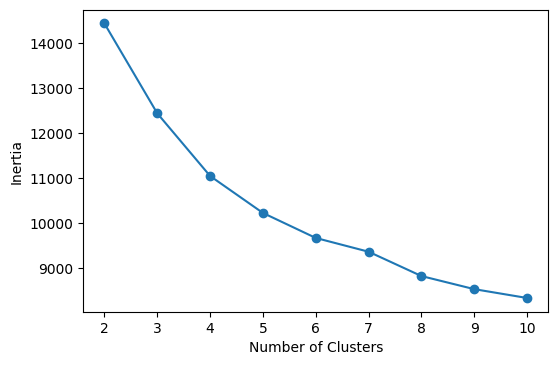

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi = 100)
plt.plot(k_array, inertia_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

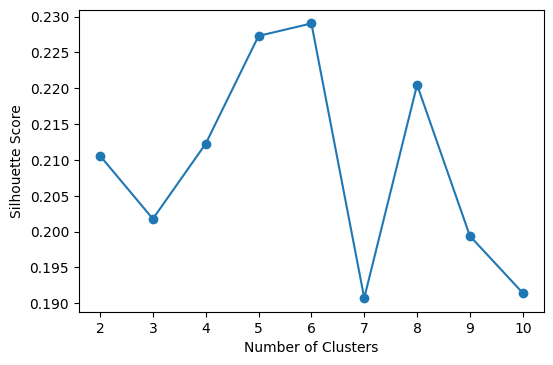

In [ ]:
plt.figure(dpi = 100)
plt.plot(k_array, silhouette_list, marker ="o")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

## I selected 5 as a particular K in my code due to it has the highest silhouette score.

In [ ]:
#Rerun clustering algorithm with best k, print out the cluster centers.

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, n_init = 5, init="k-means++")

km.fit(df_scaled)

KMeans(n_clusters=5, n_init=5)

In [ ]:
unique_counts = np.unique(km.labels_, return_counts=True)
unique_counts

(array([0, 1, 2, 3, 4], dtype=int32), array([1360, 2451, 1955, 2236, 2125]))

In [ ]:
df_centers = pd.DataFrame(km.cluster_centers_, columns = df_scaled.columns)
#Identify 2 clusters:
df_centers = df_centers.sort_values(by=['Attrition_Flag'])
df_centers

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
4,0.820706,0.428155,0.457224,0.424235,0.198024,0.024941,0.528350,0.553318,0.394353,0.409255,0.114475,0.442743,0.119013,0.219163,0.220267,0.453658,0.191130,0.332651,1.000000e+00,1.165734e-15,7.938095e-15,1.000000e+00
0,0.830147,0.411640,0.491912,0.436642,0.377941,0.023529,0.514449,0.569559,0.390931,0.403554,0.191484,0.462211,0.191399,0.221763,0.225466,0.442778,0.190762,0.277771,5.750000e-01,5.500000e-01,1.665335e-16,3.497203e-15
1,0.831905,0.446618,0.468707,0.443152,0.198776,0.013600,0.545055,0.567442,0.389433,0.397933,0.096989,0.455135,0.101350,0.224889,0.200213,0.416024,0.192892,0.354351,1.000000e+00,1.929013e-15,1.000000e+00,-4.385381e-15
2,0.843478,0.430778,0.456880,0.431543,0.664450,0.048252,0.535645,0.553964,0.388235,0.412361,0.387766,0.450022,0.380408,0.221274,0.237356,0.440441,0.190900,0.175465,-1.199041e-14,7.355228e-16,6.772360e-15,9.299233e-01
3,0.867174,0.435200,0.478265,0.432245,0.672361,0.031157,0.534166,0.569052,0.388342,0.422257,0.314362,0.498098,0.306550,0.230050,0.207769,0.384473,0.192508,0.219335,-1.376677e-14,1.595946e-15,1.000000e+00,-1.554312e-15


Customers with highest attrition flag means that the bank loses less customers from this group. Cluster 2 has the highest attrition flag. When we look at the Income_Category column, 0.67 says that when income increasing loyalty of customer increases too. Also from cluster 0(lowest atrition flag) has 0.19 value for Income_Category which indicates when income decreasing loyalty of customer decreases too. Customer_age, education level, Months_on_book, Total_Relationship_Count are not useful data for clustering. Gender and Marital Status info are also not useful. Credit Limit is high for loyal customers and lowfor  the not loyal ones(lowes attrition flag). As a result income and credit limit are more definitive than the others.